In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import librosa
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm

DATA_PATH = "/content/drive/My Drive/audio_data"

Using TensorFlow backend.


In [ ]:
def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)

In [ ]:
labels,_,_ = get_labels()
print(labels)

['google khol do', 'lights off', 'lights on', 'gaana bajado']


In [ ]:
# convert file to wav2mfcc
# Mel-frequency cepstral coefficients
def wav2mfcc(file_path, n_mfcc=20, max_len=11):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = np.asfortranarray(wave[::3])
    mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=n_mfcc)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

In [ ]:
path = DATA_PATH
wavfiles = [wavfile for wavfile in os.listdir(path + '/' + 'google khol do')]
print(wavfiles)

['12 Mar, 21.27(3).wav', '12 Mar, 21.29.wav', '12 Mar, 21.17(2).wav', '12 Mar, 21.17.wav', '12 Mar, 21.28(4).wav', '12 Mar, 21.26(3).wav', '12 Mar, 21.26(2).wav', '12 Mar, 21.27.wav', '12 Mar, 21.28(2).wav', 'goo1.wav', 'goo10.wav', 'goo9.wav', 'goo4.wav', 'goo2.wav', 'goo8.wav', 'goo3.wav', 'goo5.wav', 'goo6.wav', 'goo7.wav']


In [ ]:
def save_data_to_array(path=DATA_PATH, max_len=11, n_mfcc=20):
    labels, _, _ = get_labels(path)

    for label in labels:
        # Init mfcc vectors
        mfcc_vectors = []

        wavfiles = [wavfile for wavfile in os.listdir(path + '/' + label)]
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = wav2mfcc(path + '/' +label + '/' + wavfile, max_len=max_len, n_mfcc=n_mfcc)
            mfcc_vectors.append(mfcc)
        np.save(label + '.npy', mfcc_vectors)

In [ ]:
def get_train_test(split_ratio=0.8, random_state=42):
    # Get available labels
    labels, indices, _ = get_labels(DATA_PATH)

    # Getting first arrays
    X = np.load(labels[0] + '.npy')
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

In [ ]:
def prepare_dataset(path=DATA_PATH):
    labels, _, _ = get_labels(path)
    data = {}
    for label in labels:
        data[label] = {}
        data[label]['path'] = [path  + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]

        vectors = []

        for wavfile in data[label]['path']:
            wave, sr = librosa.load(wavfile, mono=True, sr=None)
            # Downsampling
            wave = wave[::3]
            mfcc = librosa.feature.mfcc(wave, sr=16000)
            vectors.append(mfcc)

        data[label]['mfcc'] = vectors

    return data

In [ ]:
print(data)

NameError: ignored

In [ ]:
def load_dataset(path=DATA_PATH):
    data = prepare_dataset(path)

    dataset = []

    for key in data:
        for mfcc in data[key]['mfcc']:
            dataset.append((key, mfcc))

    return dataset

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.4MB 8.3MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 163kB 37.5MB/s 
     |████████████████████████████████| 112kB 45.3MB/s 
     |████████████████████████████████| 102kB 11.5MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73870 sha256=a7c2e5a8b60ec09757386123ac14671d663e9e47b34cccb218864fb72cc81805
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=8a8e3cc0d125b155f33bc92051a1226e0fe37c1f89cc62869615f62e3c2a8b46
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=10

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

In [ ]:

'''config.update({"buckets":20},allow_val_change=True)'''
'''save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)'''
accuracylist=[]
labels = ['google khol do', 'lights off', 'lights on', 'gaana bajado']
for i in range(10,30,5):
  wandb.init()
  config = wandb.config
  config.max_len = 11
  '''config.update({"buckets":20},allow_val_change=True)'''
  config.buckets = i
  save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)
  channels = 1
  config.epochs = 50
  config.batch_size = 32
  num_classes = 4
  X_train, X_test, y_train, y_test = get_train_test()
  print(X_train.shape)
  print(X_test.shape)
  X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
  X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)
  y_train_hot = to_categorical(y_train)
  y_test_hot = to_categorical(y_test)
  model = Sequential()
  model.add(Conv2D(32,
    (3, 3),
    input_shape=(config.buckets, config.max_len, channels),
    activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling2D(pool_size=(2, 2)))



  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
  history=model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])
  modelaccuracy=history.history['val_accuracy']
  accuracylist.append(modelaccuracy[-1])

Saving vectors of label - 'gaana bajado': 100%|██████████| 30/30 [00:04<00:00,  7.05it/s]


(105, 10, 11)
(27, 10, 11)
Train on 105 samples, validate on 27 samples
Epoch 1/50
105/105 [==============================] - 1s 5ms/step - loss: 30.6403 - accuracy: 0.2667 - val_loss: 14.2960 - val_accuracy: 0.3333
Epoch 2/50
105/105 [==============================] - 0s 255us/step - loss: 20.8516 - accuracy: 0.2762 - val_loss: 13.7808 - val_accuracy: 0.3704
Epoch 3/50
105/105 [==============================] - 0s 255us/step - loss: 22.9670 - accuracy: 0.3905 - val_loss: 10.1442 - val_accuracy: 0.4444
Epoch 4/50
105/105 [==============================] - 0s 265us/step - loss: 16.7751 - accuracy: 0.3810 - val_loss: 11.2359 - val_accuracy: 0.3333
Epoch 5/50
105/105 [==============================] - 0s 242us/step - loss: 14.9233 - accuracy: 0.3429 - val_loss: 9.1029 - val_accuracy: 0.4074
Epoch 6/50
105/105 [==============================] - 0s 232us/step - loss: 12.0365 - accuracy: 0.4476 - val_loss: 12.7339 - val_accuracy: 0.3704
Epoch 7/50
105/105 [==============================] - 0

Saving vectors of label - 'gaana bajado': 100%|██████████| 30/30 [00:04<00:00,  6.77it/s]


(105, 15, 11)
(27, 15, 11)
Train on 105 samples, validate on 27 samples
Epoch 1/50
105/105 [==============================] - 0s 1ms/step - loss: 16.6959 - accuracy: 0.3048 - val_loss: 6.6047 - val_accuracy: 0.3333
Epoch 2/50
105/105 [==============================] - 0s 355us/step - loss: 14.8682 - accuracy: 0.3333 - val_loss: 10.1787 - val_accuracy: 0.2963
Epoch 3/50
105/105 [==============================] - 0s 337us/step - loss: 13.0548 - accuracy: 0.3905 - val_loss: 9.2133 - val_accuracy: 0.2963
Epoch 4/50
105/105 [==============================] - 0s 354us/step - loss: 9.7943 - accuracy: 0.3905 - val_loss: 9.1207 - val_accuracy: 0.2593
Epoch 5/50
105/105 [==============================] - 0s 726us/step - loss: 9.3800 - accuracy: 0.4000 - val_loss: 8.1425 - val_accuracy: 0.2593
Epoch 6/50
105/105 [==============================] - 0s 323us/step - loss: 7.9846 - accuracy: 0.4667 - val_loss: 8.3960 - val_accuracy: 0.2222
Epoch 7/50
105/105 [==============================] - 0s 603us

Saving vectors of label - 'gaana bajado': 100%|██████████| 30/30 [00:04<00:00,  6.77it/s]


(105, 20, 11)
(27, 20, 11)
Train on 105 samples, validate on 27 samples
Epoch 1/50
105/105 [==============================] - 0s 2ms/step - loss: 27.3190 - accuracy: 0.3143 - val_loss: 12.9877 - val_accuracy: 0.4444
Epoch 2/50
105/105 [==============================] - 0s 381us/step - loss: 20.7819 - accuracy: 0.3048 - val_loss: 6.7832 - val_accuracy: 0.4074
Epoch 3/50
105/105 [==============================] - 0s 502us/step - loss: 12.3250 - accuracy: 0.3238 - val_loss: 5.9389 - val_accuracy: 0.3704
Epoch 4/50
105/105 [==============================] - 0s 396us/step - loss: 11.9674 - accuracy: 0.3143 - val_loss: 6.3661 - val_accuracy: 0.4074
Epoch 5/50
105/105 [==============================] - 0s 408us/step - loss: 9.6667 - accuracy: 0.3143 - val_loss: 7.8069 - val_accuracy: 0.3333
Epoch 6/50
105/105 [==============================] - 0s 471us/step - loss: 9.0690 - accuracy: 0.4000 - val_loss: 6.9860 - val_accuracy: 0.5556
Epoch 7/50
105/105 [==============================] - 0s 399u

Saving vectors of label - 'gaana bajado': 100%|██████████| 30/30 [00:04<00:00,  6.56it/s]


(105, 25, 11)
(27, 25, 11)
Train on 105 samples, validate on 27 samples
Epoch 1/50
105/105 [==============================] - 0s 2ms/step - loss: 30.1370 - accuracy: 0.2762 - val_loss: 19.2232 - val_accuracy: 0.3704
Epoch 2/50
105/105 [==============================] - 0s 456us/step - loss: 25.7561 - accuracy: 0.3143 - val_loss: 18.7395 - val_accuracy: 0.4444
Epoch 3/50
105/105 [==============================] - 0s 446us/step - loss: 22.0599 - accuracy: 0.3333 - val_loss: 6.4366 - val_accuracy: 0.2593
Epoch 4/50
105/105 [==============================] - 0s 461us/step - loss: 14.4250 - accuracy: 0.3333 - val_loss: 6.2349 - val_accuracy: 0.2593
Epoch 5/50
105/105 [==============================] - 0s 514us/step - loss: 10.7472 - accuracy: 0.3619 - val_loss: 7.9805 - val_accuracy: 0.4815
Epoch 6/50
105/105 [==============================] - 0s 566us/step - loss: 9.6816 - accuracy: 0.4667 - val_loss: 4.1819 - val_accuracy: 0.3333
Epoch 7/50
105/105 [==============================] - 0s 84

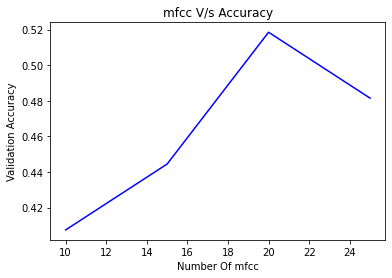

In [ ]:
import matplotlib.pyplot as plt
mfcclist=range(10,30,5)
plt.plot(mfcclist,accuracylist, 'b', label='Training accuracy')
plt.title('mfcc V/s Accuracy')
plt.xlabel('Number Of mfcc')
plt.ylabel('Validation Accuracy')
plt.show()

In [ ]:
print(accuracylist)

[0.40740740299224854, 0.4444444477558136, 0.5185185074806213, 0.48148149251937866]


In [ ]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = get_train_test()
print(y_train)

[2. 2. 0. 0. 3. 2. 1. 2. 3. 1. 0. 2. 2. 1. 1. 2. 2. 1. 3. 2. 0. 1. 2. 1.
 2. 1. 2. 2. 1. 0. 2. 3. 1. 1. 1. 0. 2. 1. 3. 0. 1. 2. 3. 3. 0. 0. 3. 0.
 0. 1. 2. 3. 0. 2. 3. 3. 1. 1. 3. 1. 2. 2. 3. 2. 3. 2. 1. 2. 2. 1. 2. 3.
 2. 2. 1. 3. 2. 2. 3. 1. 1. 3. 3. 0. 1. 1. 0. 1. 3. 2. 3. 2. 3. 2. 2. 2.
 3. 3. 1. 2. 2. 3. 0. 2. 3.]


TypeError: ignored

In [ ]:
# # Feature dimension
channels = 1
config.epochs = 50
config.batch_size = 32

num_classes = 4

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

In [ ]:
print(X_train.shape)

print(X_test.shape)

(105, 20, 11, 1)
(27, 20, 11, 1)


In [ ]:
plt.imshow(X_train[100, :, :, 0])
print(y_train[100])

IndexError: ignored

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**GOOGLE KHOL DO**

In [ ]:
import IPython
def opengoogle():
  display(IPython.display.Javascript('''window.open('https://google.com/')'''))

In [ ]:
opengoogle()

<IPython.core.display.Javascript object>

**GAANA VAJA DO**

In [ ]:
def playsong():
  display(IPython.display.Javascript('''window.open('https://www.youtube.com/watch?v=XqZsoesa55w')'''))

In [ ]:
playsong()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

model = Sequential()
model.add(Flatten(input_shape=(config.buckets, config.max_len)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [ ]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Train on 105 samples, validate on 27 samples
Epoch 1/50
105/105 [==============================] - 0s 3ms/step - loss: 136.4006 - accuracy: 0.2857 - val_loss: 118.4273 - val_accuracy: 0.3333
Epoch 2/50
105/105 [==============================] - 0s 98us/step - loss: 101.1077 - accuracy: 0.2857 - val_loss: 99.3318 - val_accuracy: 0.1852
Epoch 3/50
105/105 [==============================] - 0s 197us/step - loss: 82.4678 - accuracy: 0.2190 - val_loss: 77.8552 - val_accuracy: 0.1852
Epoch 4/50
105/105 [==============================] - 0s 529us/step - loss: 59.4796 - accuracy: 0.2000 - val_loss: 54.4127 - val_accuracy: 0.4074
Epoch 5/50
105/105 [==============================] - 0s 83us/step - loss: 45.5273 - accuracy: 0.3333 - val_loss: 47.4496 - val_accuracy: 0.4444
Epoch 6/50
105/105 [==============================] - 0s 119us/step - loss: 46.6341 - accuracy: 0.3429 - val_loss: 43.8187 - val_accuracy: 0.4815
Epoch 7/50
105/105 [==============================] - 0s 92us/step - loss: 40.90

In [ ]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)
model = Sequential()
model.add(LSTM(16, input_shape=(config.buckets,config.max_len), activation="sigmoid"))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:

model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [ ]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])


Train on 105 samples, validate on 27 samples
Epoch 1/50
105/105 [==============================] - 1s 5ms/step - loss: 1.4184 - accuracy: 0.1429 - val_loss: 1.4270 - val_accuracy: 0.1481
Epoch 2/50
105/105 [==============================] - 0s 371us/step - loss: 1.4146 - accuracy: 0.1429 - val_loss: 1.4229 - val_accuracy: 0.1481
Epoch 3/50
105/105 [==============================] - 0s 404us/step - loss: 1.4110 - accuracy: 0.1429 - val_loss: 1.4188 - val_accuracy: 0.1481
Epoch 4/50
105/105 [==============================] - 0s 707us/step - loss: 1.4077 - accuracy: 0.1429 - val_loss: 1.4151 - val_accuracy: 0.1481
Epoch 5/50
105/105 [==============================] - 0s 386us/step - loss: 1.4044 - accuracy: 0.1429 - val_loss: 1.4119 - val_accuracy: 0.1481
Epoch 6/50
105/105 [==============================] - 0s 381us/step - loss: 1.4017 - accuracy: 0.1429 - val_loss: 1.4087 - val_accuracy: 0.1481
Epoch 7/50
105/105 [==============================] - 0s 432us/step - loss: 1.3987 - accuracy

In [ ]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len,channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len,channels)
print(X_train.shape)
#first layer
model = Sequential()
model.add(Conv2D(32,
    (3, 3),
    input_shape=(config.buckets, config.max_len, channels),
    activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

(105, 20, 11, 1)


In [ ]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [ ]:
wandb.init()
history=model.fit(X_train, y_train_hot, epochs=50, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])
print(history.history['accuracy'])

Train on 105 samples, validate on 27 samples
Epoch 1/50
105/105 [==============================] - 0s 429us/step - loss: 0.4068 - accuracy: 0.8667 - val_loss: 3.0795 - val_accuracy: 0.5556
Epoch 2/50
105/105 [==============================] - 0s 344us/step - loss: 0.5389 - accuracy: 0.8000 - val_loss: 3.0426 - val_accuracy: 0.5185
Epoch 3/50
105/105 [==============================] - 0s 373us/step - loss: 0.3412 - accuracy: 0.8952 - val_loss: 3.8555 - val_accuracy: 0.4815
Epoch 4/50
105/105 [==============================] - 0s 345us/step - loss: 0.3332 - accuracy: 0.8667 - val_loss: 3.3233 - val_accuracy: 0.5556
Epoch 5/50
105/105 [==============================] - 0s 343us/step - loss: 0.3810 - accuracy: 0.8667 - val_loss: 3.1082 - val_accuracy: 0.4444
Epoch 6/50
105/105 [==============================] - 0s 354us/step - loss: 0.4257 - accuracy: 0.8476 - val_loss: 3.3983 - val_accuracy: 0.4444
Epoch 7/50
105/105 [==============================] - 0s 346us/step - loss: 0.5135 - accura

     |████████████████████████████████| 32.8MB 125kB/s 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 33 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 2s (105 kB/s)
Select

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  ffmpeg* libasound2-dev* libportaudio2* libportaudiocpp0* portaudio19-dev*
0 upgraded, 0 newly installed, 5 to remove and 33 not upgraded.
After this operation, 3,832 kB disk space will be freed.
(Reading database ... 144423 files and directories currently installed.)
Removing ffmpeg (7:3.4.6-0ubuntu0.18.04.1) ...
Removing portaudio19-dev:amd64 (19.6.0-1) ...
Removing libasound2-dev:amd64 (1.1.3-5ubuntu0.5) ...
Removing libportaudiocpp0:amd64 (19.6.0-1) ...
Removing libportaudio2:amd64 (19.6.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

(Re

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libnvidia-common-440
0 upgraded, 0 newly installed, 1 to remove and 33 not upgraded.
After this operation, 35.8 kB disk space will be freed.
(Reading database ... 144273 files and directories currently installed.)
Removing libnvidia-common-440 (440.100-0ubuntu0.18.04.1) ...


Uninstalling PyAudio-0.2.11:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/PyAudio-0.2.11.dist-info/*
    /usr/local/lib/python3.6/dist-packages/_portaudio.cpython-36m-x86_64-linux-gnu.so
    /usr/local/lib/python3.6/dist-packages/pyaudio.py
Proceed (y/n)? y
  Successfully uninstalled PyAudio-0.2.11


<IPython.core.display.Javascript object>

ValueError: ignored

     |████████████████████████████████| 11.4MB 350kB/s 
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


error: ignored

OSError: ignored

FileNotFoundError: ignored


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p


In [ ]:
!pip install ffmpeg-python

In [ ]:

from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

**Record Audio From Microphone**

In [ ]:
audio, sr=get_audio()

In [ ]:
audio.shape
sr

48000

In [ ]:
audio
import scipy

In [ ]:
scipy.io.wavfile.write('/content/drive/My Drive/vg1.wav', sr,audio)


NameError: ignored

In [ ]:
import librosa
import numpy as np
max_len=11
wave, sr = librosa.load('/content/drive/My Drive/vg1.wav', mono=True, sr=None)
wave = np.asfortranarray(wave[::3])
mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=20)
    # If maximum length exceeds mfcc lengths then pad the remaining ones
if (max_len > mfcc.shape[1]):
  pad_width = max_len - mfcc.shape[1]
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
else:
  mfcc = mfcc[:, :max_len]
mfcc.shape

(20, 11)

In [ ]:
mfcc=mfcc.reshape(1,20,11,1)
c=model.predict_classes(mfcc)
print(c)

if c==2:
  opengoogle()
if c==3:
  playsong()


[2]


<IPython.core.display.Javascript object>